##### First, load and examine the dataset.

##### Here I  will import the required Python libraries for data analysis and visualization in this stage.

##### To comprehend the structure of the aircraft accident dataset, load it into a Pandas DataFrame and view the first few rows.

##### Prior to cleaning and analysis, the objective is to obtain a general understanding of the dataset.


In [163]:
# Import necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization




In [164]:
# Load the dataset
aviation_data = pd.read_csv("AviationData.csv",encoding='latin1',low_memory=False)  
usstate_data = pd.read_csv("USState_Codes.csv",encoding='latin1') 



##### .head(),shows the first few rows of each dataset.
 one can detect column names, data types, and any problems like missing values with the help of this.
 ##### -We possess two datasets:

 ##### -AviationData.csv: This file contains reports of aircraft accidents.

 ##### -State abbreviations are mapped to full state names in USState_Codes.csv.

In [165]:
# Display the first few rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [166]:

usstate_data.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [167]:
# Check the number of rows and columns
print("Aviation Data Shape:", aviation_data.shape)
print("US State Data Shape:", usstate_data.shape)



Aviation Data Shape: (88889, 31)
US State Data Shape: (62, 2)


##### The results above shows that the aviation data has 88889 number of rows and 31 number of columns.
##### same to the state data , 62 rows and 2 columns

In [168]:
# Display column names
print("Aviation Data Columns:")
aviation_data.columns

Aviation Data Columns:


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [169]:
print("US State Data Columns:")
print(usstate_data.columns)

US State Data Columns:
Index(['US_State', 'Abbreviation'], dtype='object')


### An summary of each dataset is obtained by running.info(), and it includes:

 ##### The total number of entries (rows) in the dataset.
 ##### Columns (Features): Shows the available attributes in the dataset.
 ##### Data Types:This indicates whether a column is object (string), float64, int64, etc.
 ##### Non-Null Counts: Assists in locating any missing values in every column.In this case we have some columns that have missing values
 ##### Memory Usage: Shows how much memory is used by the dataset.


In [170]:
# Get summary info (data types, missing values, etc.)
print("Aviation Data Info:")
aviation_data.info()

print("\nUS State Data Info:")
usstate_data.info()

Aviation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make              

In [171]:
# here we are looking for any duplicates in our dataset
aviation_data.duplicated().value_counts()
#usstate_data.duplicated().value_counts()

False    88889
dtype: int64

In [172]:
usstate_data.duplicated().value_counts()

False    62
dtype: int64

##### In both cases we the output is False meaning that both datasets have no duplicates which is good.

In [173]:
# this displays the total missing values of the data in descending order
aviation_data.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

#### The above ouput displays that our data has plenty of missing values. in this case its good to find the percentage of the missing values and decide if we should drop the missing values, replace with(mean,min or max)

In [174]:
# here we count missing values in each column
missing_values = aviation_data.isnull().sum()

# Then filter and display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Get the percentage of missing values
missing_percentage = (missing_values / len(aviation_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage.sort_values(ascending=False))



Percentage of Missing Values:
Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.0585

##### Now that we know the percentage of missing values, we are going to create a copy of the aviation data and use that to solve the problem so as not to alter with the original data.

In [175]:
# Create a copy of the original data, in this case its called 'aviation_clean'.
aviation_clean=aviation_data.copy(deep=True)


##### Bellow we are dropping the columns with 45% or more of missing data
##### The ones with 44% and below we are going to replace the , categorical columns with 'Unknown' and the numerical columns with the 'median'

In [ ]:
# Set limit to drop columns with more than 45% missing values
limit = 0.45  
missing_ratio = aviation_clean.isnull().sum() / len(aviation_clean)

# Identify columns to drop
columns_to_drop = missing_ratio[missing_ratio > limit].index

# Drop those columns
aviation_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

#print the column names that have been dropped
print(f"Dropped columns: {list(columns_to_drop)}")


Dropped columns: ['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier']


In [178]:
# This is to confirm if the columns have been dropped, and check on the remaining missing values.
aviation_clean.isnull().sum().sort_values(ascending=False)

Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: int64

In [188]:
# Here we are dfining the categorical data types so that we can replace the missing values with 'unknown'.
categorical_data = [
    "Airport.Code", "Airport.Name", "Broad.phase.of.flight", "Report.Status",
    "Purpose.of.flight", "Weather.Condition", "Aircraft.damage",
    "Registration.Number", "Injury.Severity", "Country", "Engine.Type",
    "Amateur.Built", "Model", "Make", "Location"
]




In [189]:
# Here we are defining the numerical data so that we can replac them with the 'median'.
numerical_data = [
    "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Fatal.Injuries",
    "Number.of.Engines", "Total.Uninjured"
]




In [ ]:
# Now we Fill categorical columns with "Unknown"
aviation_clean.loc[:, categorical_data] = aviation_clean.loc[:, categorical_data].fillna("Unknown")

# Here we Fill numerical columns with median values
aviation_clean.loc[:, numerical_data] = aviation_clean.loc[:, numerical_data].fillna(aviation_clean[numerical_data].median())

# Here we Fill date column with mode (most frequent date)
if "Publication.Date" in aviation_clean.columns:
    aviation_clean.loc[:, "Publication.Date"] = aviation_clean["Publication.Date"].fillna(aviation_clean["Publication.Date"].mode()[0])


##### We can see from the below shape our columns have reduced due to the dropped columns and we no longer have missing values which is good so far.
##### Our cuurent shape is 25 columns and 88,889 rows

In [191]:
# This shows the number of missing values after cleaning and now it has non
aviation_clean.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [192]:
# This now shows the new number of columns and rows after dropping 
aviation_clean.shape

(88889, 25)

#### VISUALIZATION
##### Examining Aeronautical Accident Patterns and Hazards

 ##### By identifying risk variables, trends, and patterns, data visualization helps us gain important insights regarding aviation accidents.
 ##### It is easier to comprehend accident causes, high-risk flying periods, injury severities, and other important factors thanks to these visuals.

 ##### We can reduce operational risks for the business, optimize aircraft selection, and enhance aviation safety by evaluating this data and offering data-driven advice.


In [196]:
# Count accidents by cause/factor
cause_counts = aviation_clean["Event.Factor"].value_counts().head(10)  # Adjust column name if needed

# Pie chart
plt.figure(figsize=(8, 8))
cause_counts.plot(kind="pie", autopct="%1.1f%%", cmap="Set2", startangle=90)
plt.ylabel("")  # Hide the default label
plt.title("Top 10 Causes of Aviation Accidents")
plt.show()


KeyError: 'Event.Factor'

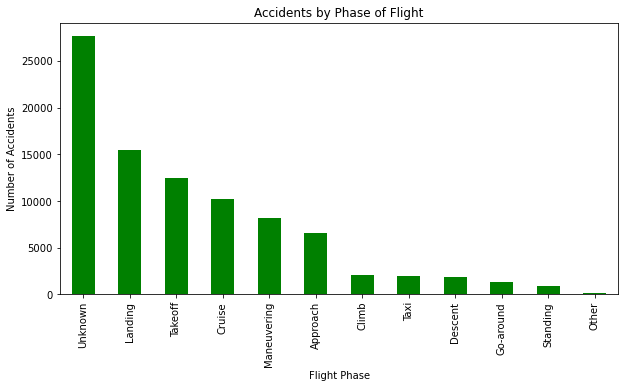

In [199]:
# Count accidents by flight phase
flight_phase_counts = aviation_clean["Broad.phase.of.flight"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
flight_phase_counts.plot(kind="bar", color="g")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Phase of Flight")
plt.show()


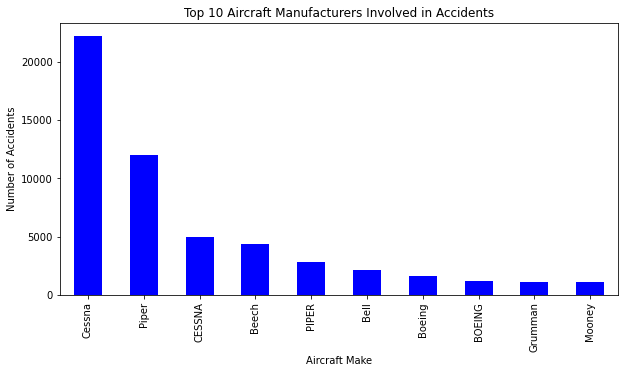

In [201]:
# Top 10 most common aircraft manufacturers in accidents
top_aircraft = aviation_clean["Make"].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 5))
top_aircraft.plot(kind="bar", color="b")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Manufacturers Involved in Accidents")
plt.show()
